**Lab-1**

Tasks to be performed:

a. Implement a descriptive Question answering System (Like
ChatGPT/Gemini) using NLG by utilizing the LLM Models (any
foundation model can use).

b. While testing the Model, Understand the concept of Prompt
Engineering, Optimization of the Prompt and Understand the impact
of prompt formulation on model output. (Give all the insights as an
example in the Colab file)

c. Enter any 3 the same prompt in your model, Gemini and ChatGPT and
retrieve the answer and upload. Understand the difference of prompt
in each model (as shown the following Gemini and ChatGPT).

d. Upload any 3 the sample question and answers that you have
generated (in Colab file).

Installation of the libraries

In [ ]:
!pip uninstall -y torch torchvision torchaudio
!pip install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu118
!pip install -q transformers accelerate sentencepiece


Found existing installation: torch 2.2.2+cu118
Uninstalling torch-2.2.2+cu118:
  Successfully uninstalled torch-2.2.2+cu118
Found existing installation: torchvision 0.17.2+cu118
Uninstalling torchvision-0.17.2+cu118:
  Successfully uninstalled torchvision-0.17.2+cu118
Found existing installation: torchaudio 2.2.2+cu118
Uninstalling torchaudio-2.2.2+cu118:
  Successfully uninstalled torchaudio-2.2.2+cu118
Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.2.2%2Bcu118-cp311-cp311-linux_x86_64.whl (819.2 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.17.2%2Bcu118-cp311-cp311-linux_x86_64.whl (6.2 MB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.2.2%2Bcu118-cp311-cp311-linux_x86_64.whl (3.3 MB)


In [6]:
!pip install numpy==1.24.4 --force-reinstall


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 114.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
ERROR: Operation cancelled by user


In [ ]:
!pip install transformers --upgrade --force-reinstall


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.8/514.8 kB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6

Loading the FLAN-T5 Model

In [7]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import torch

# Model ID and device
model_id = "google/flan-t5-large"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load tokenizer and model, move model to GPU
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id).to(device)



Prompt 1:  *prompt = f"Answer this question in a descriptive and simple way:\n{user_input}"*

In [8]:
def descriptive_qa_chatbot():
    print("🧠 Descriptive Q&A Chatbot (type 'exit' to quit)\n")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chatbot: Goodbye! 👋")
            break

        prompt = f"Answer this question in a descriptive and simple way:\n{user_input}"
        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        outputs = model.generate(**inputs, max_length=256,min_length=50, temperature=0.7, top_p=0.9, do_sample=True)
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        print(f"Chatbot: {response}\n")

In [9]:
descriptive_qa_chatbot()


🧠 Descriptive Q&A Chatbot (type 'exit' to quit)

You: what is AI?


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
def descriptive_qa_chatbot():
    print("🧠 Descriptive Q&A Chatbot (type 'exit' to quit)\n")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chatbot: Goodbye! 👋")
            break

        prompt = f"Explain like I’m 5 years old:\n{user_input}"
        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        outputs = model.generate(**inputs, max_length=256)
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        print(f"Chatbot: {response}\n")

In [ ]:
descriptive_qa_chatbot()

In [ ]:
def descriptive_qa_chatbot():
    print("🧠 Descriptive Q&A Chatbot (type 'exit' to quit)\n")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chatbot: Goodbye! 👋")
            break

        prompt = f"Answer the following question with a real-world example:\n{user_input}"
        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        outputs = model.generate(**inputs, max_length=256)
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        print(f"Chatbot: {response}\n")

In [ ]:
descriptive_qa_chatbot()

In [ ]:
def descriptive_qa_chatbot():
    print("🧠 Descriptive Q&A Chatbot (type 'exit' to quit)\n")
    while True:
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("Chatbot: Goodbye! 👋")
            break

        prompt = f"Explain the following concept in detail using real-world examples, analogies, and multiple sentences:\n{user_input}"

        inputs = tokenizer(prompt, return_tensors="pt").to("cuda")
        outputs = model.generate(**inputs, max_length=512, num_beams=4, early_stopping=True)
        response = tokenizer.decode(outputs[0], skip_special_tokens=True)

        print(f"Chatbot: {response}\n")

In [ ]:
descriptive_qa_chatbot()

Comparison with ChatGPT and Gemini

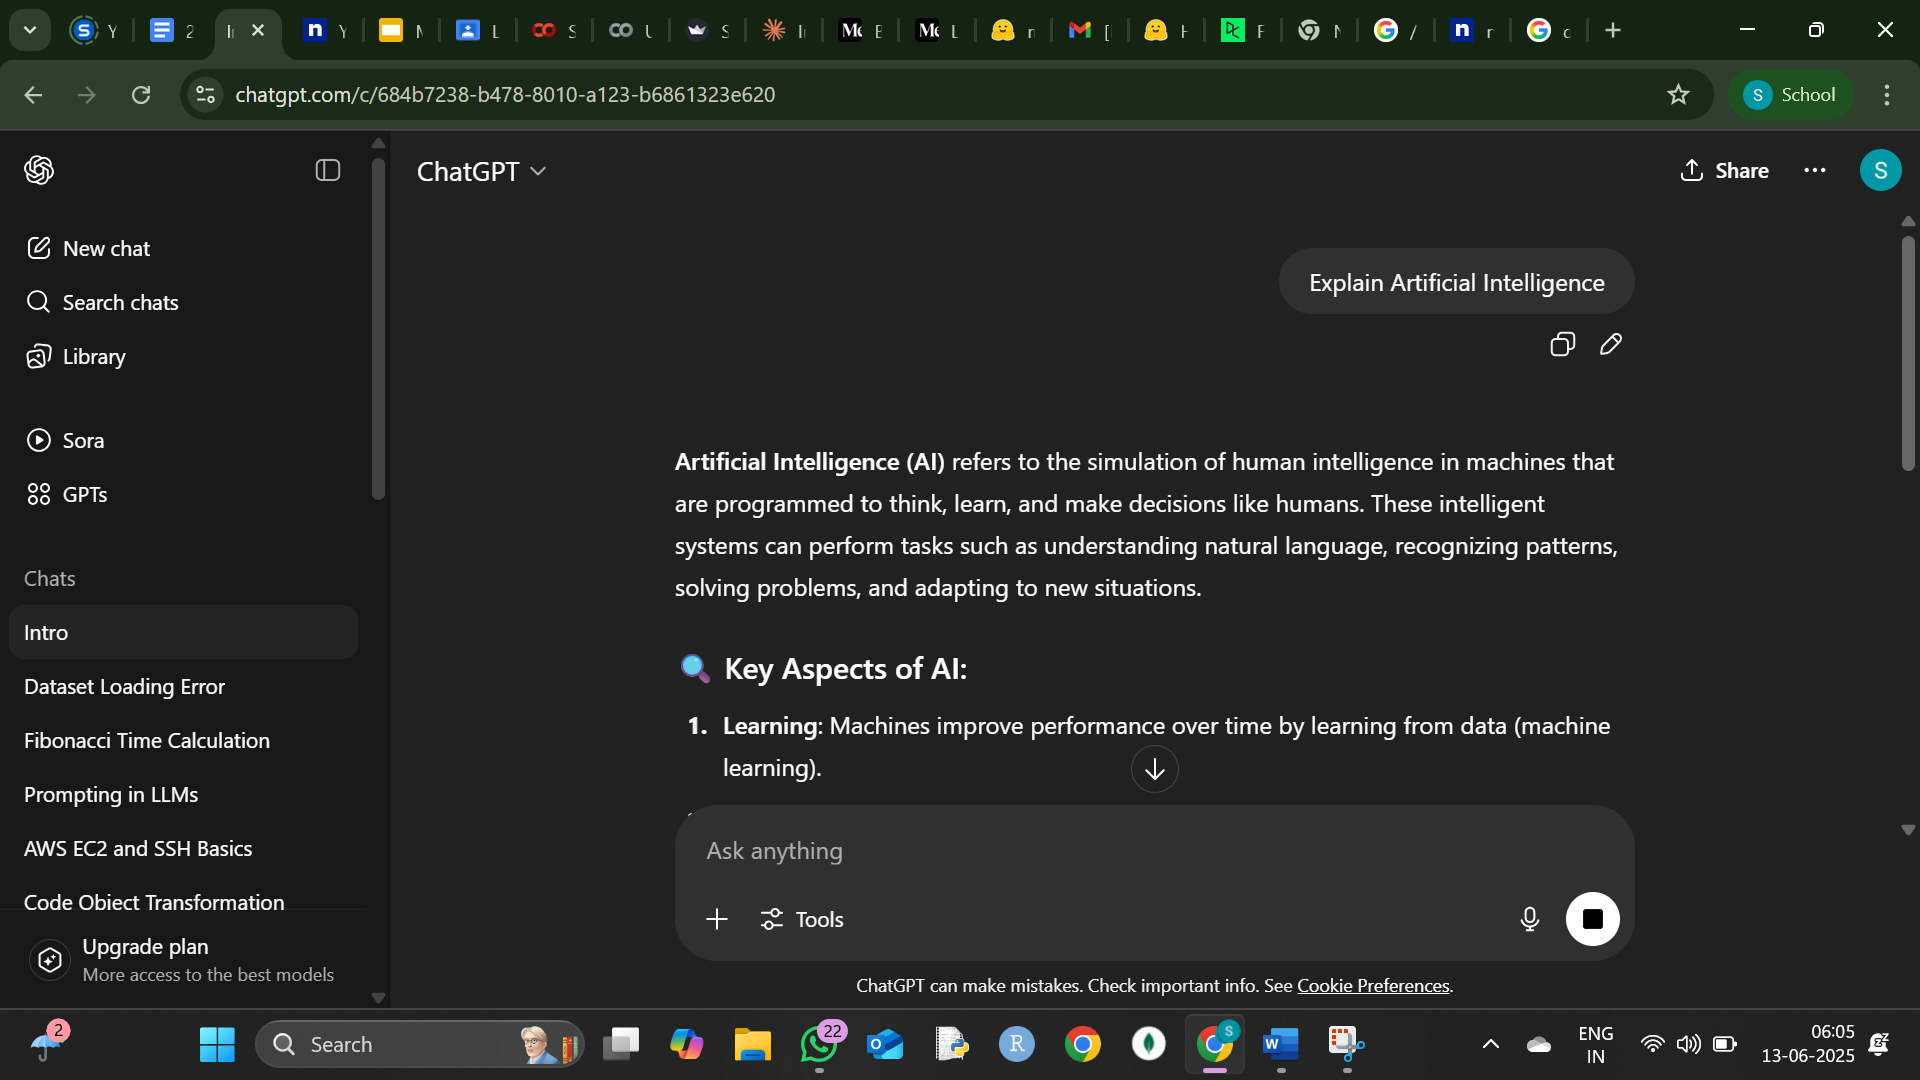

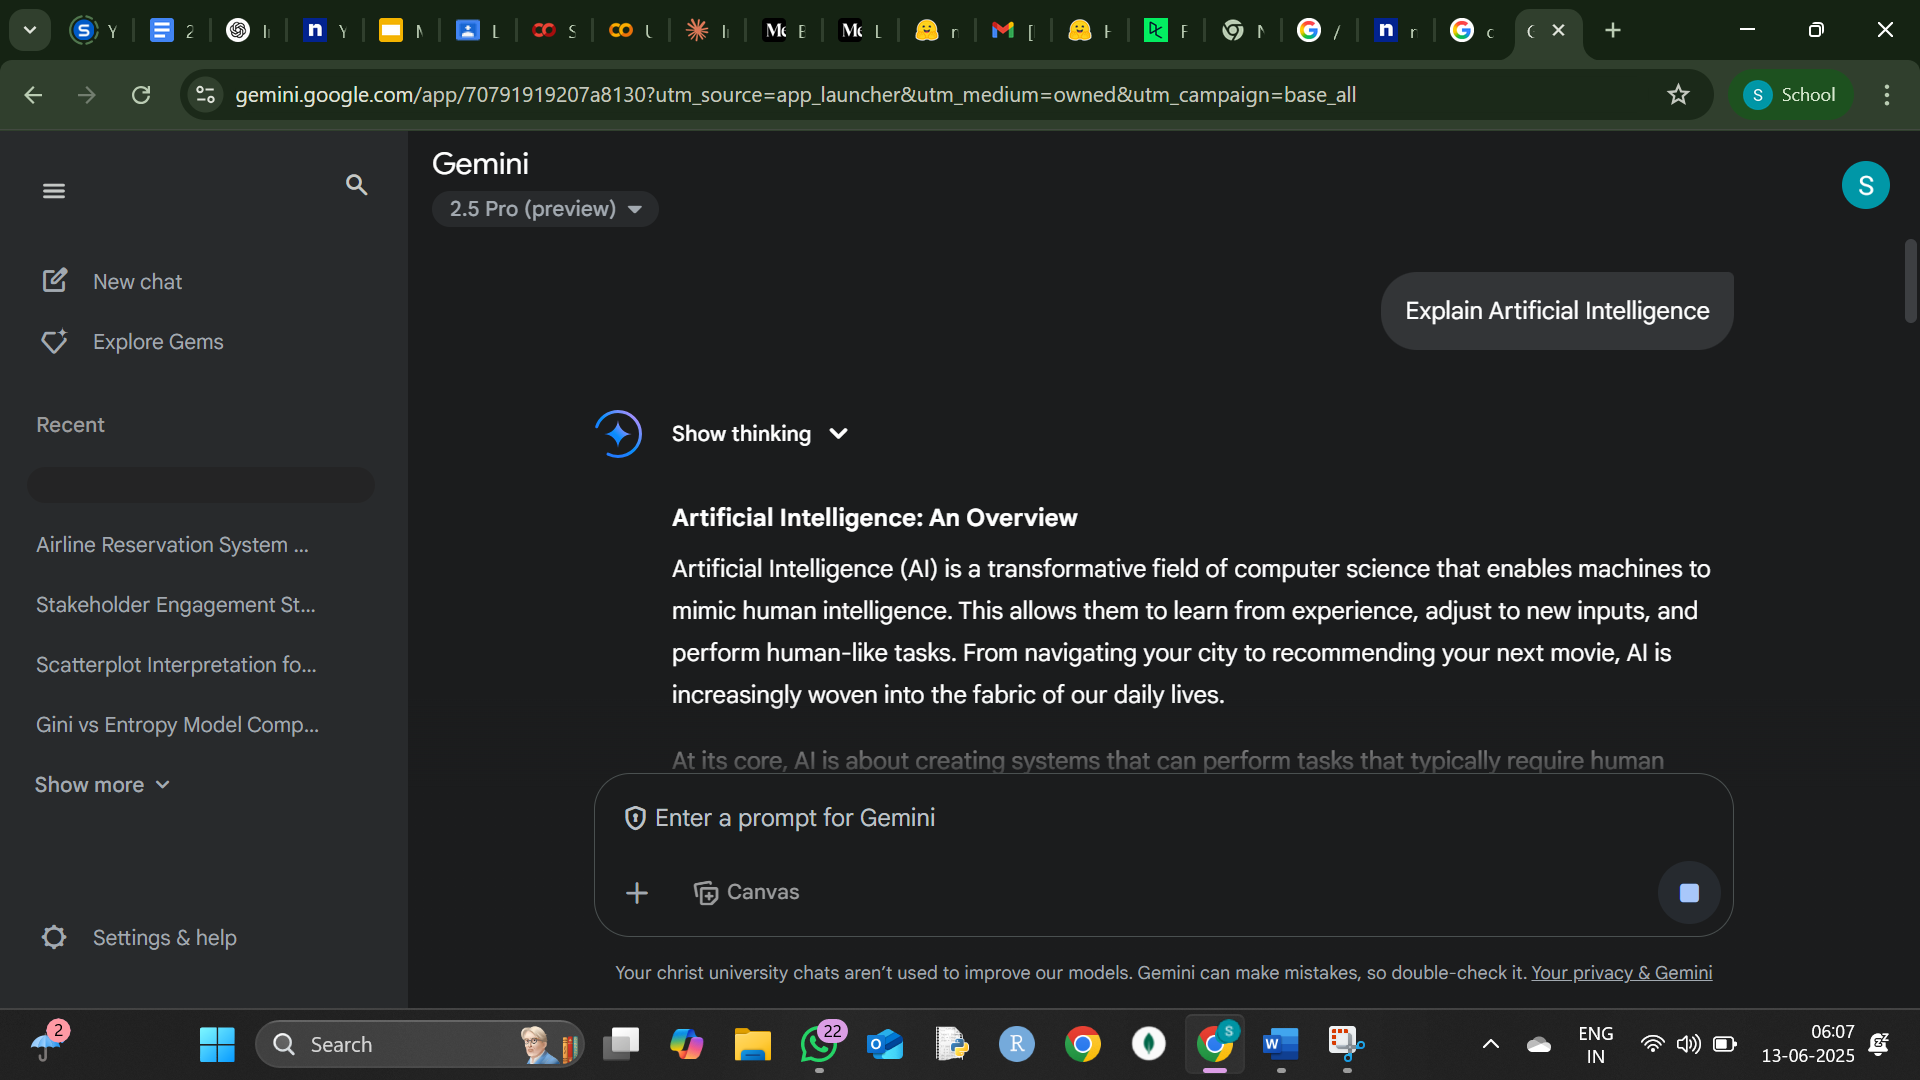

(d)any 3 the sample question and answers

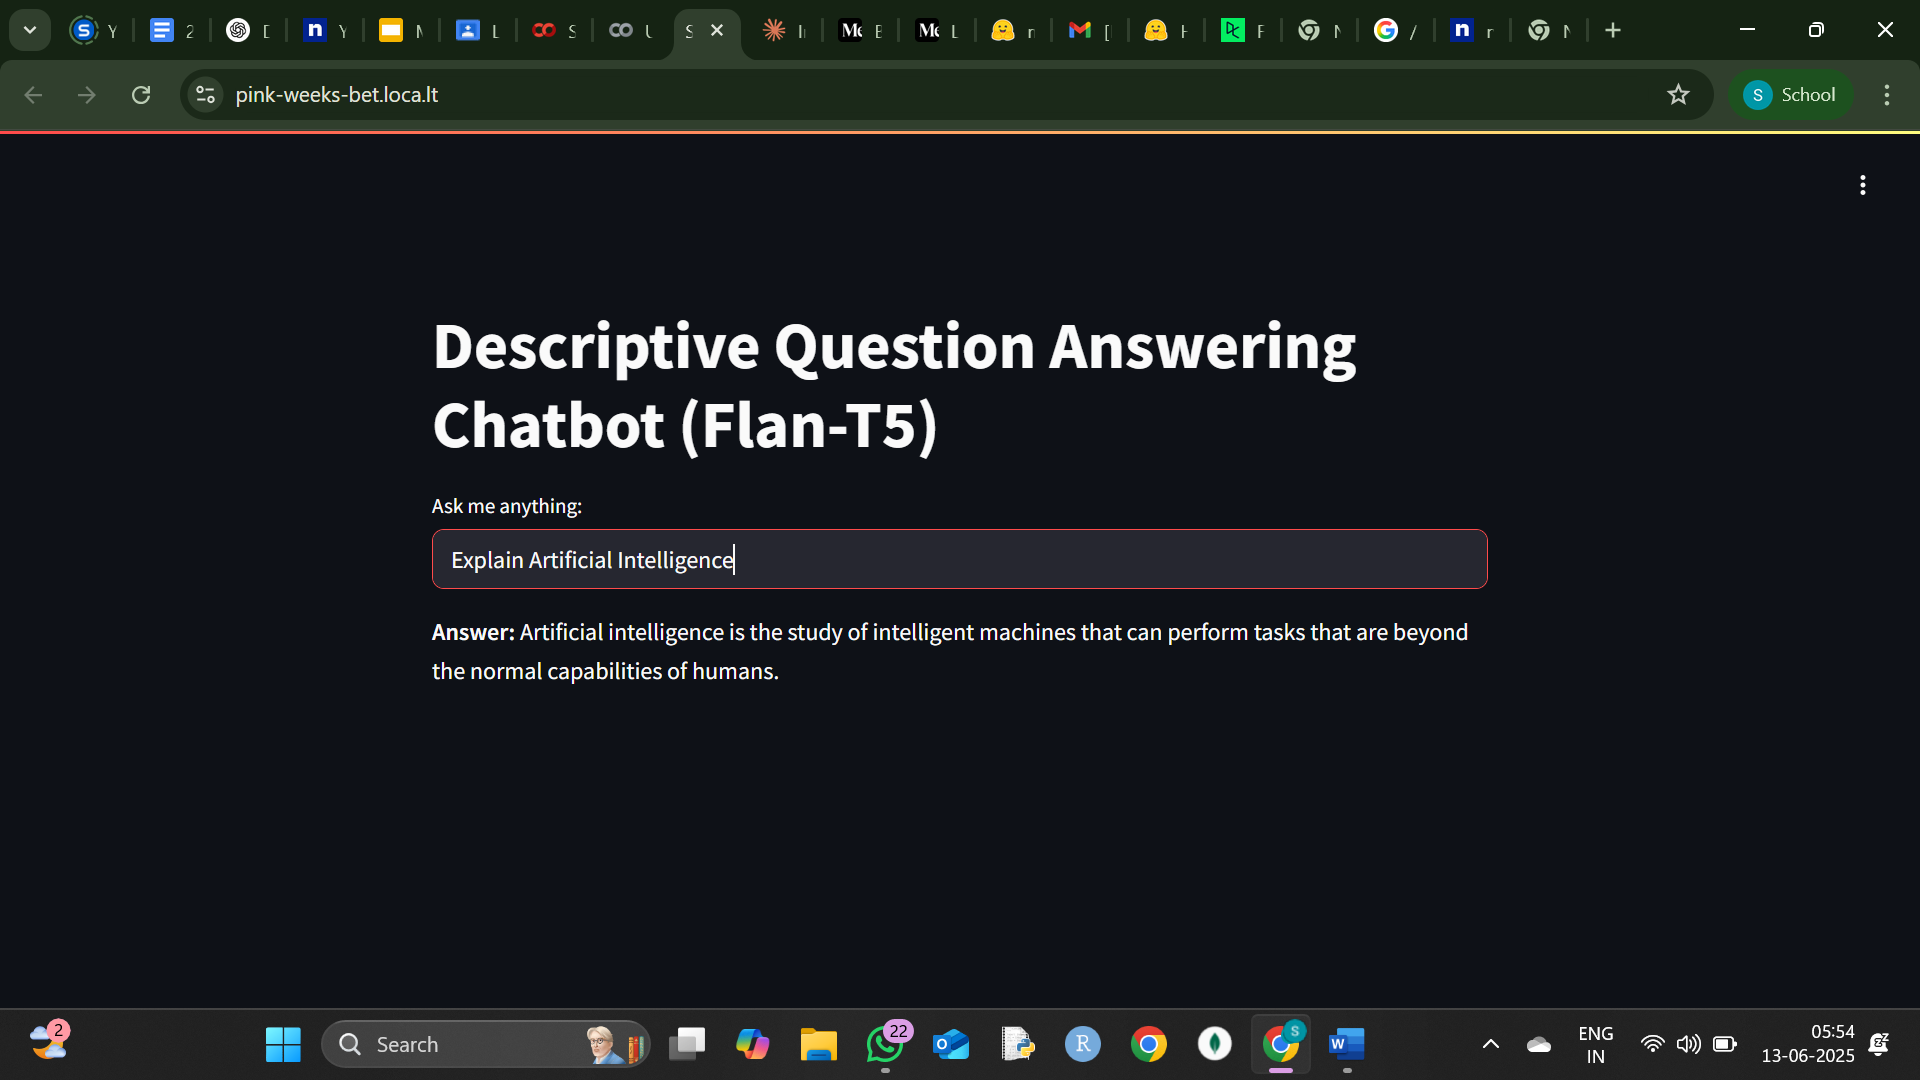

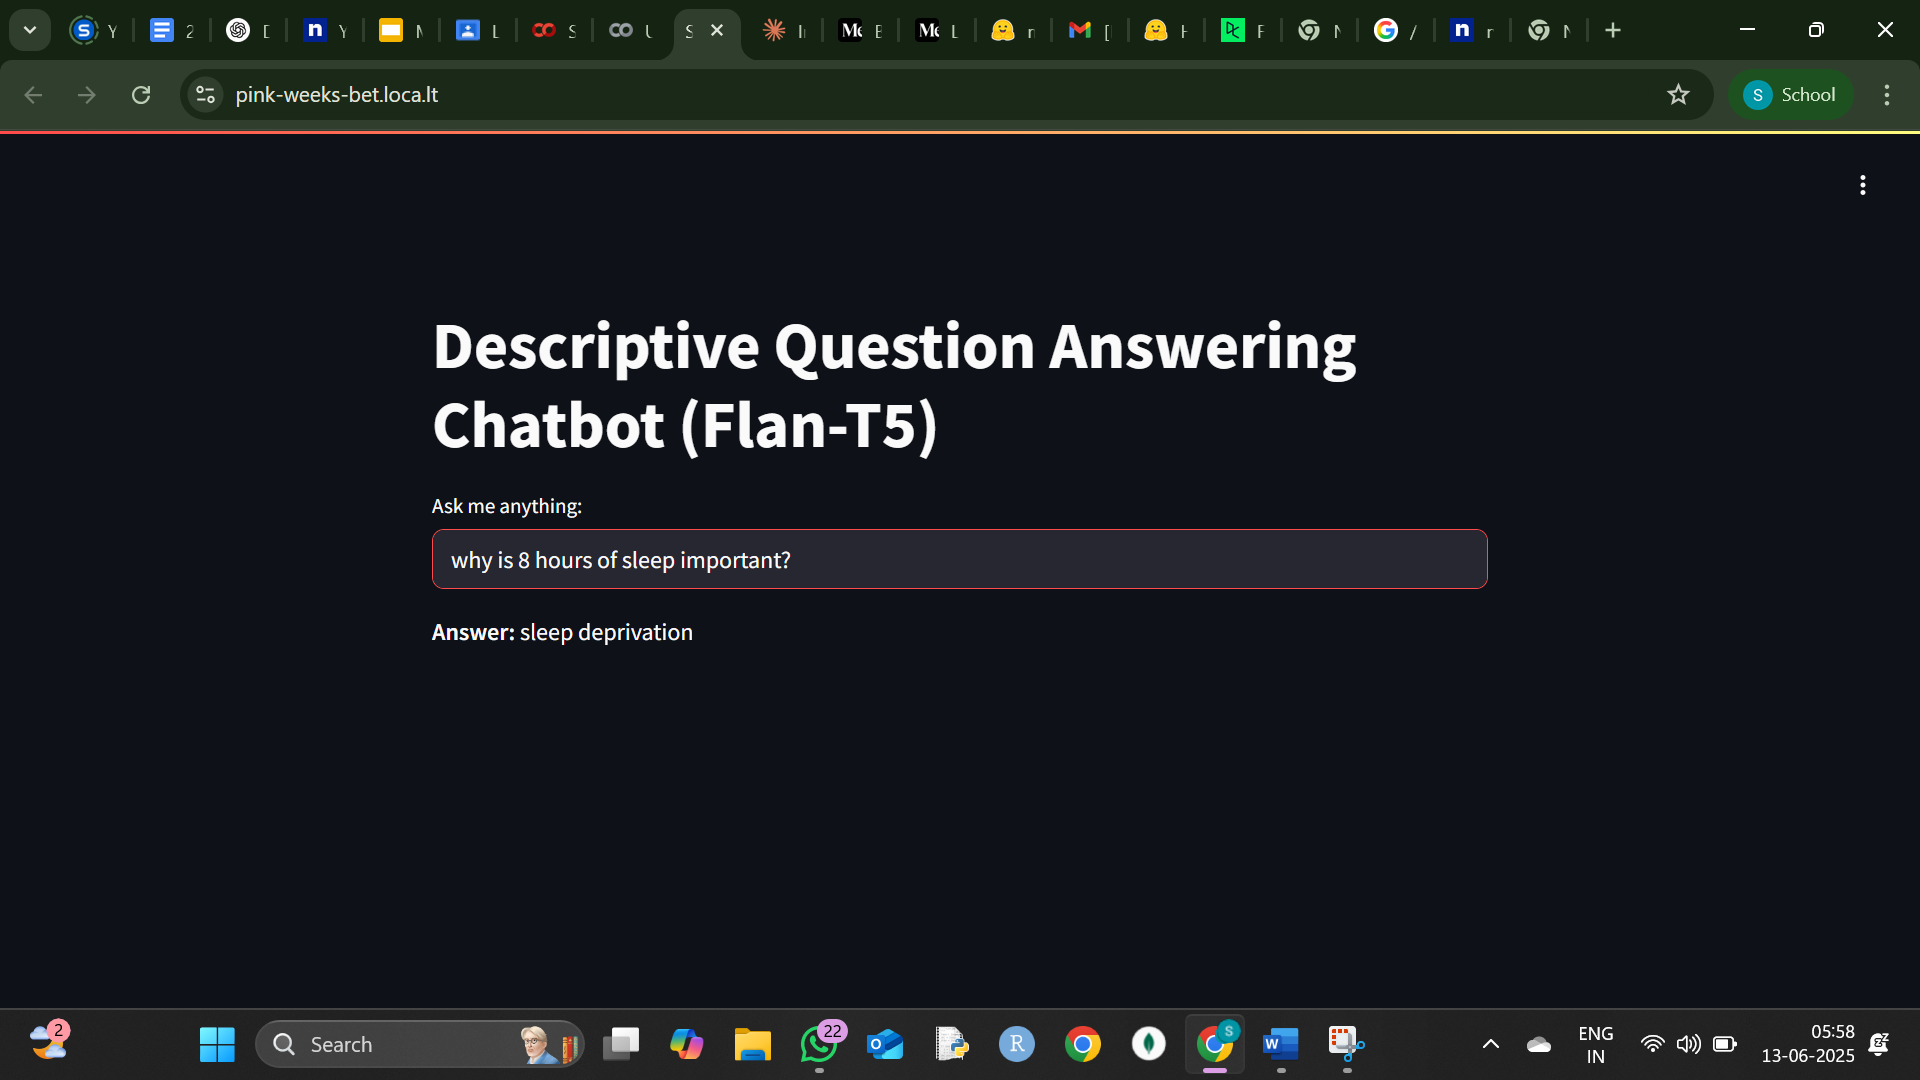

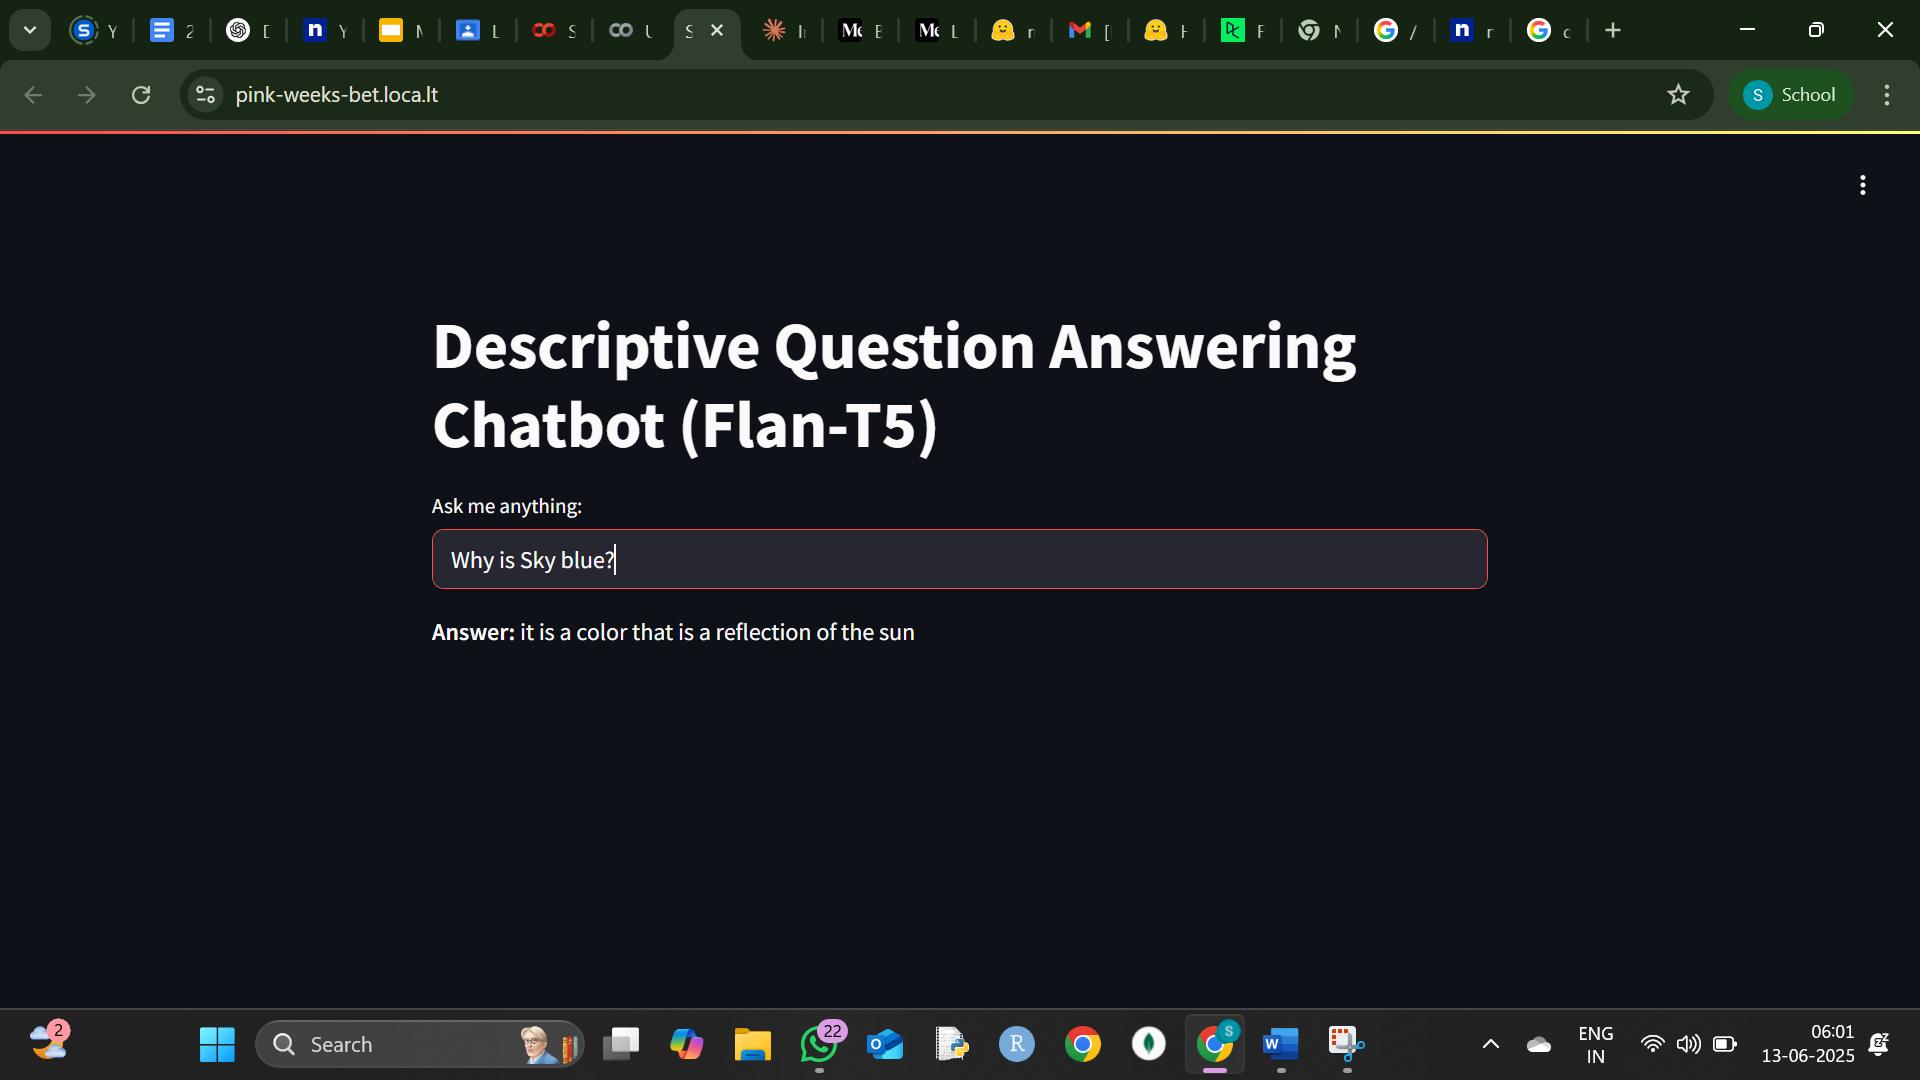

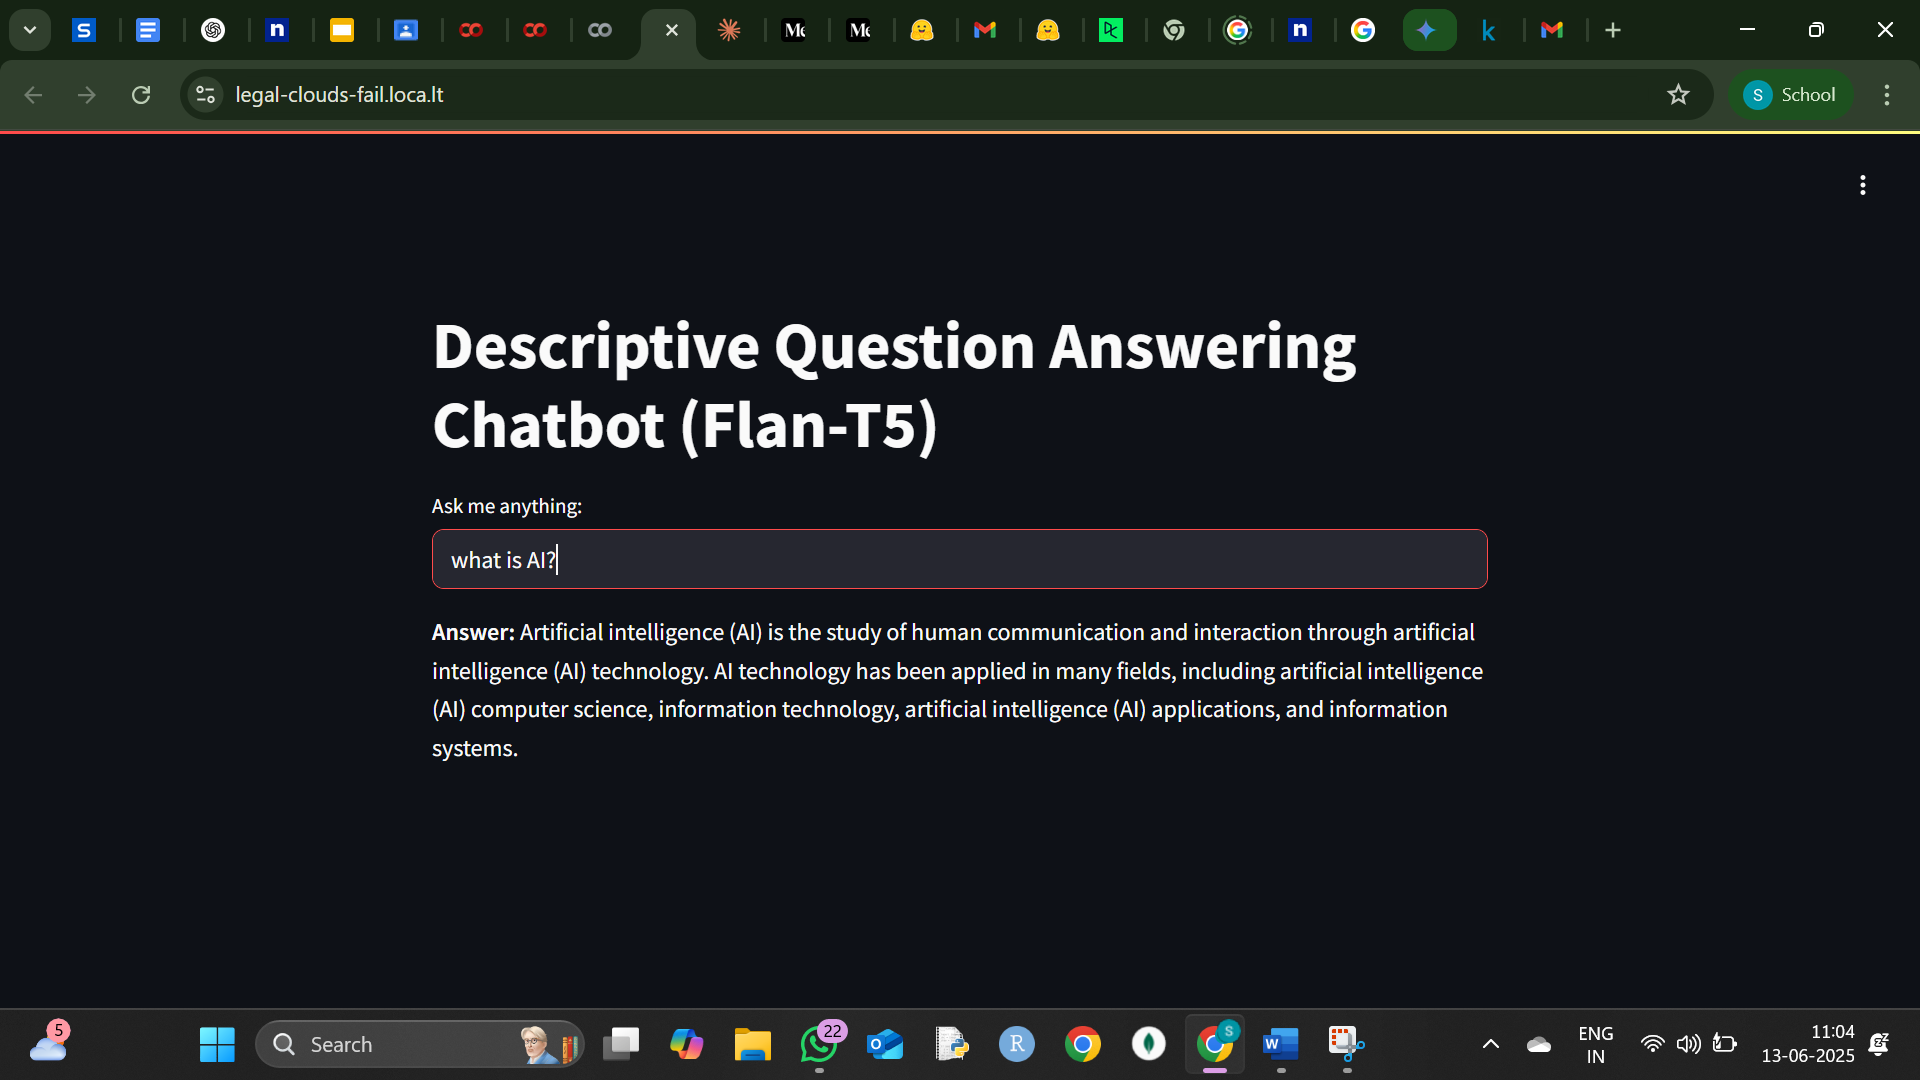